# Transformers zero shot classification

##1 zero shot learning pipeline

-Install transformers and select T4 GPU<br>
-Check cuda device<br>
-import numpy, pandas, matplotlib, seaborn<br>
-import sklearn.metrics  f1_score, confusion_matrix, classification_report


In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.0 MB/s eta 0:00:00


In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [5]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


###1.1 Zero-shot learning examples

In [6]:
classifier("This is a great movie.", candidate_labels=['positive','negative','neutral'])

{'sequence': 'This is a great movie.',
 'labels': ['positive', 'neutral', 'negative'],
 'scores': [0.9909444451332092, 0.005105636548250914, 0.003949959762394428]}

-Use the classifier and create example output for a positive, negative and about 5 neutral sentiments.

In [7]:
###STUDENTS###
test = ["This is a great movie.", "The weather is bad.", "He is studying.", "She drinks coffee.", "I sleep.", "This is my book.", "I am eating cake in the moring.", "The car is white."]
classifier(test, candidate_labels=['positive','negative','neutral'])

[{'sequence': 'This is a great movie.',
  'labels': ['positive', 'neutral', 'negative'],
  'scores': [0.9909444451332092, 0.005105636548250914, 0.003949959762394428]},
 {'sequence': 'The weather is bad.',
  'labels': ['negative', 'neutral', 'positive'],
  'scores': [0.9899246096611023, 0.006834756582975388, 0.0032405974343419075]},
 {'sequence': 'He is studying.',
  'labels': ['neutral', 'positive', 'negative'],
  'scores': [0.3942450284957886, 0.3537020981311798, 0.2520528733730316]},
 {'sequence': 'She drinks coffee.',
  'labels': ['positive', 'negative', 'neutral'],
  'scores': [0.4416855573654175, 0.32050105929374695, 0.23781335353851318]},
 {'sequence': 'I sleep.',
  'labels': ['negative', 'neutral', 'positive'],
  'scores': [0.5017417669296265, 0.29373452067375183, 0.2045237123966217]},
 {'sequence': 'This is my book.',
  'labels': ['positive', 'neutral', 'negative'],
  'scores': [0.44851383566856384, 0.281377375125885, 0.27010878920555115]},
 {'sequence': 'I am eating cake in th

##2 Sentiment zero-shot learning

-The necessary steps (and the code to use) are very similar to the sentiment prediction task, but this time we use also the neutral class, next to the positive and negative class.<br>
-With zero shot learning, the classifier might learn to classify for the neutral class.

###2.1 Prepare data set

-Read the Tweets.csv dataset and call it df.

In [9]:
###STUDENTS###
df = pd.read_csv("Tweets.csv")

-Keep the neutral sentiments.<br>
-Select the same 500 randomized (random_state=42) positive, 500 negative instances and 500 neutral sentiments.

In [10]:
###STUDENTS###

#Decrease negative labels by making a random selection from the 9000 negative laels
# Sample 2500 random rows with negative class labels
negative_indices = df[df['airline_sentiment'] == 'negative'].sample(n=500, random_state=42).index
positive_indices = df[df['airline_sentiment'] == 'positive'].sample(n=500, random_state=42).index
neutral_indices = df[df['airline_sentiment'] == 'neutral'].sample(n=500, random_state=42).index

# Create separate DataFrames for positive and selected negative instances
df_positive = df.loc[positive_indices]
df_negative = df.loc[negative_indices]
df_neutral = df.loc[neutral_indices]

# Concatenate the DataFrames to combine them
df = pd.concat([df_negative, df_positive, df_neutral])


-Check the last 100 instances

In [11]:
###STUDENTS###
#read Tweets.csv head
sample = df.iloc[-100:]
sample

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
2272,569282692014977025,neutral,0.6325,NaN,0.0,United,NaN,JSJ35,NaN,0,@united where's the crew for ua748?,NaN,2015-02-21 15:49:05 -0800,Blue Area of the Moon,Eastern Time (US & Canada)
3791,568122284474544128,neutral,0.6530,NaN,0.0,United,NaN,ptau,NaN,0,@united Cancelled Flighting. bought a ticket f...,NaN,2015-02-18 10:58:02 -0800,Chasing Carmen San Diego,Central Time (US & Canada)
9856,569638479157723136,neutral,0.6682,NaN,0.0,US Airways,NaN,georgetietjen,NaN,0,@USAirways So any ideas when the IT Geeks will...,NaN,2015-02-22 15:22:51 -0800,NaN,NaN
7474,569577434657492992,neutral,0.6575,NaN,NaN,Delta,NaN,ChrisDonahoe,NaN,0,"@JetBlue w/ edits: Dear @msbgu , your MBAs nee...",NaN,2015-02-22 11:20:17 -0800,"Washington, D.C.",Quito
9361,569969506740674560,neutral,1.0000,NaN,NaN,US Airways,NaN,NotClayManship,NaN,0,@USAirways Am I allowed to carry on a suit bag...,NaN,2015-02-23 13:18:14 -0800,Indianapolis,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,568812654346653697,neutral,0.6392,NaN,NaN,Delta,NaN,gloeb90,NaN,0,@JetBlue OK cool. I need to listen to some Dr...,NaN,2015-02-20 08:41:19 -0800,NY,NaN
1642,569638013287862273,neutral,1.0000,NaN,NaN,United,NaN,ChrisOneputt91,NaN,0,@united I am UA elite Gold and have a UA Chase...,NaN,2015-02-22 15:21:00 -0800,NaN,NaN
1948,569507197052260354,neutral,1.0000,NaN,NaN,United,NaN,Angry_VBK,NaN,0,@united question. Are departure times based of...,NaN,2015-02-22 06:41:11 -0800,NaN,NaN
1287,569851498118516736,neutral,0.6551,NaN,0.0,United,NaN,anthonyNYSSF,NaN,0,@united please help http://t.co/t5mRj5Yw6I,NaN,2015-02-23 05:29:19 -0800,NaN,Eastern Time (US & Canada)


-count label values in the df data set for the column 'airline_sentiment'

In [16]:
###STUDENTS###
df['airline_sentiment'].value_counts()

negative    500
positive    500
neutral     500
Name: airline_sentiment, dtype: int64

-create a list of unique labels with the name 'labels' for the label values of the df data set column airline_sentiment.

In [17]:
###STUDENTS###
labels=list(set(df['airline_sentiment']))
labels

['neutral', 'positive', 'negative']

###2.2 Predict

Modify the code: <br>
classifier("This is a great movie.", candidate_labels=['positive','negative','neutral']) <br>

-Replace "This is a great movie", by the text column of the df data set, and cast it to a list.<br>
-Replace ['positive','negative','neutral'] labels by the unique labels list 'labels'.<br>
-the output should be stored in the list 'preds'.<br>

-Output format example:<br>

{'sequence': '@SouthwestAir thanks for your excellent response time and assistance! All set :)',
 'labels': ['positive', 'neutral', 'negative'],
 'scores': [0.9702585935592651, 0.020787056535482407, 0.008954361081123352]},<br>
...

In [18]:
###STUDENTS###
preds = classifier(df['text'].tolist(), candidate_labels = labels)

-Check a negative, positive, and neutral label prediction.

-Check a negative target example

In [19]:
###STUDENTS###
preds[0]

{'sequence': "@united of course I would like hepl! Are you kidding me? That's the ONLY reason I've been on hold for the past 5 hours!",
 'labels': ['negative', 'positive', 'neutral'],
 'scores': [0.5250351428985596, 0.40261557698249817, 0.07234928011894226]}

-Check a positive target example

In [20]:
###STUDENTS###
preds[900]

{'sequence': '@united flight 1491...plane from SFO to DEN is basically on time.',
 'labels': ['positive', 'neutral', 'negative'],
 'scores': [0.7116022706031799, 0.2510751783847809, 0.03732258081436157]}

-Check a neutral target example

In [21]:
###STUDENTS###
preds[1001]

{'sequence': '@SouthwestAir Maybe it is just a machine...',
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.5648007392883301, 0.3657304644584656, 0.06946872919797897]}

-make a list 'predicted_labels' containing the predicted labels with the highest score per case. <br>
-For the example: <br>

-{'sequence': '@USAirways obviously your corporate definition of PATIENCE needs to be reviewed.',
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.8840194344520569, 0.07365462183952332, 0.042325928807258606]},<br>

label with the highest score is here 'negative'.<br>
The highest score is each time the first one in the scores list.



In [22]:
###STUDENTS###
predicted_labels = [p['labels'][0] for p in preds]

-Add the list 'predicted_labels' as a column to the df data set with the name 'predicted_labels'

In [23]:
###STUDENTS###
df['predicted_labels']=predicted_labels

-Check the first 5 instances in the updated df data set.

In [24]:
###STUDENTS###
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,predicted_labels
2046,569438531686424577,negative,1.0000,Customer Service Issue,1.0000,United,NaN,Whosgunz,NaN,0,@united of course I would like hepl! Are you k...,NaN,2015-02-22 02:08:20 -0800,NaN,NaN,negative
9615,569821862873726976,negative,0.6679,Bad Flight,0.6679,US Airways,NaN,Peakway3,NaN,0,@USAirways Raleigh to Chicago and no #firstcla...,NaN,2015-02-23 03:31:33 -0800,North Carolina,NaN,negative
4531,570059574268469248,negative,1.0000,Can't Tell,0.6622,Southwest,NaN,TheRandyHarbin,NaN,0,@SouthwestAir has become like every other airl...,NaN,2015-02-23 19:16:08 -0800,Kansas City MO,Central Time (US & Canada),negative
6884,570063322449616896,negative,0.6196,Can't Tell,0.3152,Delta,NaN,DarthVada_R2D2,NaN,0,@JetBlue - Hopefully that will help someone in...,NaN,2015-02-23 19:31:01 -0800,NaN,Atlantic Time (Canada),positive
11226,568396913726382080,negative,1.0000,Can't Tell,0.6404,US Airways,NaN,NovaCat91,NaN,0,@USAirways my wife is trying to check in for a...,NaN,2015-02-19 05:09:19 -0800,"40.0587, -75.3659",Eastern Time (US & Canada),negative


-Map the labels: <br>
 'positive' to 1 <br>
 'negative' to 0 <br>
 'neutral' to 2 <br>
 -for the columns 'airline_sentiment', 'predicted_labels',<br>
 and store resulting labels,
 for 'airline_sentiment' in a new column 'target'
 for 'predicted_labels' in a new column 'prediction' <br>

 in the df data set

In [25]:
###STUDENTS###
target_map = {'negative' : 0, 'positive' : 1, 'neutral' : 2}
df['target']=df['airline_sentiment'].map(target_map)
df['prediction']=df['predicted_labels'].map(target_map)
df['target']


2046     0
9615     0
4531     0
6884     0
11226    0
        ..
8070     2
1642     2
1948     2
1287     2
11291    2
Name: target, Length: 1500, dtype: int64

In [26]:
df['prediction']

2046     0
9615     0
4531     0
6884     1
11226    0
        ..
8070     1
1642     1
1948     1
1287     1
11291    1
Name: prediction, Length: 1500, dtype: int64

###2.3 Metrics

-Calculate accuracy

In [27]:
###STUDENTS###
print('accuracy', np.mean(df['target']==df['prediction']))


accuracy 0.6186666666666667


-Calculate precision, recall, F1-score with metrics per sentiment class.

In [28]:
###STUDENTS###
report = classification_report(df['target'], df['prediction'], target_names=['negative', 'positive', 'neutral'])
print(report)

              precision    recall  f1-score   support

    negative       0.63      0.90      0.74       500
    positive       0.60      0.90      0.72       500
     neutral       0.93      0.05      0.10       500

    accuracy                           0.62      1500
   macro avg       0.72      0.62      0.52      1500
weighted avg       0.72      0.62      0.52      1500



-Generate a confusion matrix

In [29]:
###STUDENTS###
cm = confusion_matrix(df['target'], df['prediction'], normalize='true')
#normaliz. sums up to 1
cm

array([[0.904, 0.094, 0.002],
       [0.098, 0.9  , 0.002],
       [0.432, 0.516, 0.052]])

-Visualize the confusion matrix.

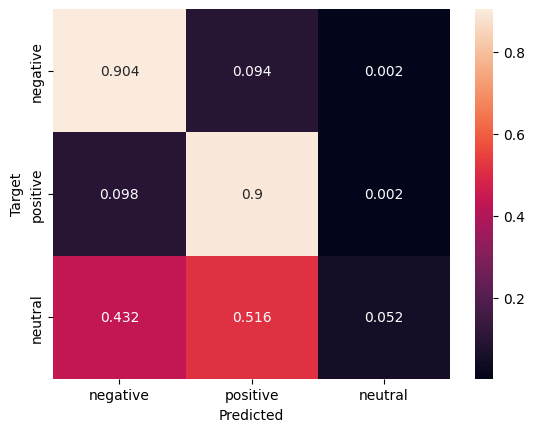

In [30]:
###STUDENTS###
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")


plot_cm(cm)

## 3 Cosine similarity

### 3.1 Cosine similarity example

The next script calculates the cosine similarity between 2 sentences, using sentence transformers.<br>
Sentence-Transformers is a state-of-the-art Python framework for embedding sentences. These embeddings can then be used for finding sentences with similar meanings using cosine similarity.<br>
Test the script with the current 2 examples, and use other examples.






In [35]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Define the sentences
sentence1 = 'I feel so good.'
sentence2 = 'I feel quite good.'

# Get embeddings for sentence 1
embeddings1 = model.encode(sentence1, convert_to_tensor=True).unsqueeze(0)

# Get embeddings for sentence 2
embeddings2 = model.encode(sentence2, convert_to_tensor=True).unsqueeze(0)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embeddings1 = embeddings1.to(device)
embeddings2 = embeddings2.to(device)

# Calculate cosine similarity
similarity = util.pytorch_cos_sim(embeddings1, embeddings2)
#similarity = cosine_similarity(embeddings1.cpu().numpy(), embeddings2.cpu().numpy())

print(f'Cosine Similarity: {similarity[0][0]}')





Cosine Similarity: 0.9515698552131653


### 3.2 Cosine similarity: search most similar sentence from a file to a specified user sentence

Adapt the script below, based on the previous script: <br>
-The goal is that you can specify an index from the commandline, the script searches the corresponding sentence, and also searches for the most semantically similar sentence in the data set.<br>
-The script reads a disastertweets.csv file into a pandas dataframe.<br>
-It reads a number from the commandline that corresponds to the index of an instance in the csv file.<br>
-It searches for the semantically closest sentence in the file, of course WITHOUT your input sentence.<br>
-As the file is large for colab,  only limit the file to the first 1500 instances.<br>
-Insert your code where indicated.

In [37]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Read the pandas dataframe
df_orig = pd.read_csv('disastertweets.csv')
#Select only the first 1500 sentences from df_orig
df = df_orig.head(1500)

# User input for index
user_index = int(input(f"Enter an index between 0 and {len(df) - 1}: "))

# Get the text from the field 'text' from df, at the index, specified by the user, using loc or iloc
user_sentence = df.loc[user_index, 'text']

# Remove the user-chosen sentence from the dataframe
df = df.drop(index=user_index).reset_index(drop=True)

# Encode the user_sentence
embeddings_user = model.encode(user_sentence, convert_to_tensor=True).unsqueeze(0)

# Initialize variables for closest sentence and similarity
closest_similarity = 0
closest_sentence = ""

# Iterate over other sentences in the modified dataframe
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for index, row in df.iterrows():
    # Encode current sentence
    embeddings_current = model.encode(row['text'], convert_to_tensor=True).unsqueeze(0)

    # Calculate cosine similarity between the sentence specified by the user and the embeddings of the other sentences.
    similarity = util.pytorch_cos_sim(embeddings_user.to(device), embeddings_current.to(device))

    # Update closest similarity and sentence
    if similarity > closest_similarity:
        closest_similarity = similarity
        closest_sentence = row['text']

print(f'Closest Sentence: {closest_sentence}')
print(f'User sentence: {user_sentence}')
print(f'Cosine Similarity: {closest_similarity.item()}')




Enter an index between 0 and 1499: 90
Closest Sentence: WATCH: Israel performs controlled detonation of land mines on Golan Heights - Jerusalem Po... http://t.co/0Y07oA5UeX #israel #israelnews
User sentence: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?
Cosine Similarity: 0.45973706245422363


### 3.3 Cosine similarity: search X most similar sentences from a file to a specified user sentence

Adapt the script below, based on the previous script: <br>
-The goal is that you can specify an index from the commandline, the script searches the corresponding sentence, and also searches for X (number) of most semantically similar sentences in the data set.<br>
-The script reads the disastertweets.csv file into a pandas dataframe.<br>
-It reads a number from the commandline that corresponds to the index of an instance in the csv file.<br>
-It also reads a number from the commandline that corresponds to the number of most similar sentences to retrieve.<br>
-As the file is large for colab,  only limit the file to the first 1500 instances.<br>
-Insert your code where indicated.

In [38]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Read the pandas dataframe from file disastertweets.csv
df_orig = pd.read_csv('disastertweets.csv')
#Select only the first 1500 sentences from df_orig
df = df_orig.head(1500)

# User input for index
user_index = int(input(f"Enter an index between 0 and {len(df) - 1}: "))

# Get the text from the field 'text' from df, at the index, specified by the user, using loc or iloc
user_sentence = df.loc[user_index, 'text']

# Remove the user-chosen sentence from the dataframe
df = df.drop(index=user_index).reset_index(drop=True)

# Encode user sentence
embeddings_user = model.encode(user_sentence, convert_to_tensor=True).unsqueeze(0)

# User input for the NUMBER of most similar sentences to predict
num_similar_sentences = int(input("Enter the number of most similar sentences to predict: "))

# Initialize a list to store top similar sentences and similarities
top_similar_sentences = []
top_similarities = []

# Iterate over other sentences in the modified dataframe
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for index, row in df.iterrows():
    # Encode current sentence
    embeddings_current = model.encode(row['text'], convert_to_tensor=True).unsqueeze(0)

    # Calculate cosine similarity between the sentence specified by the user and the embeddings of the other sentences.
    similarity = util.pytorch_cos_sim(embeddings_user.to(device), embeddings_current.to(device))

    # Store the similarity and sentence in the lists, initialized above to store top similar scores and similar sentences
    top_similarities.append(similarity.item())
    top_similar_sentences.append(row['text'])

# Get the indices of the top x most similar sentences
top_indices = sorted(range(len(top_similarities)), key=lambda i: top_similarities[i], reverse=True)[:num_similar_sentences]

# Print the user sentence
print(f'User sentence: {user_sentence}')

# Print the top x most similar sentences
print(f'Top {num_similar_sentences} Most Similar Sentences:')
for idx in top_indices:
    print(f'Sentence: {top_similar_sentences[idx]} - Cosine Similarity: {top_similarities[idx]}')


Enter an index between 0 and 1499: 100
Enter the number of most similar sentences to predict: 5
User sentence: BROOO HE JUST GOT ANNIHILATED https://t.co/UR7QkqG1wf
Top 5 Most Similar Sentences:
Sentence: Wow bro blew up quick. Believe it or not he's this funny and clever in person at all times. You be like 'where... http://t.co/djIHN95YnB - Cosine Similarity: 0.5932389497756958
Sentence: Just because of his 'precious lunch' ??? Bloody hell no brain issit??  https://t.co/X5dwKElReo - Cosine Similarity: 0.5315742492675781
Sentence: Soo..he'll be do a bit of repentance for the children's lives they've destroyed and continue to abuse and for... http://t.co/En3hKXQdD9 - Cosine Similarity: 0.5093656182289124
Sentence: Fuck around and drown ???? https://t.co/fr5z9WklMZ - Cosine Similarity: 0.5073744654655457
Sentence: Sorry Kylie pretty sure James?? ate Bruce ?? this morning. #Catastrophe  https://t.co/TR6oM9yN2C - Cosine Similarity: 0.493198424577713


### 3.4 Your variation on cosine similarity

Modify the script above in this way:<br>
-instead of specifying the number of most similar sentences, specify a similarity score.<br>
-only the pandas frame rows, with a sentence similarity score higher than the user specified score are kept in a list and printed to a new csv file.
-if there are no candidates, a message should be printed stating there are no candidates.


In [45]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Read the pandas dataframe from file disastertweets.csv
df_orig = pd.read_csv('disastertweets.csv')
# Select only the first 1500 sentences from df_orig
df = df_orig.head(1500)

# User input for index
user_index = int(input(f"Enter an index between 0 and {len(df) - 1}: "))

# Get the text from the field 'text' from df, at the index specified by the user, using loc or iloc
user_sentence = df.loc[user_index, 'text']

# Remove the user-chosen sentence from the dataframe
df = df.drop(index=user_index).reset_index(drop=True)

# Encode user sentence
embeddings_user = model.encode(user_sentence, convert_to_tensor=True).unsqueeze(0)

# User input for the similarity threshold
similarity_threshold = float(input("Enter the similarity threshold: "))

# Initialize a list to store top similar sentences and their data frame instances
top_similar_sentences = []
top_similar_instances = []

# Iterate over other sentences in the modified dataframe
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for index, row in df.iterrows():
    # Encode the current sentence
    embeddings_current = model.encode(row['text'], convert_to_tensor=True).unsqueeze(0)

    # Calculate cosine similarity between the sentence specified by the user and the embeddings of the other sentences.
    similarity = util.pytorch_cos_sim(embeddings_user.to(device), embeddings_current.to(device))

    # Check if the similarity is above the threshold
    if similarity.item() > similarity_threshold:
        # Store the sentence and its data frame instance in the lists
        top_similar_instances.append((row,similarity.item()))

# Print the user sentence
print(f'User sentence: {user_sentence}')

# print candidates list
if len(top_similar_instances) > 0:
 for elem in top_similar_instances:
     print(f'row: {elem[0]} - score {elem[1]}')
     print('-' * 50)
     # Write rows to a new output CSV file
     output_df = pd.DataFrame([elem[0] for elem in top_similar_instances])
     output_df.to_csv('output.csv', index=False)
     print('Rows with similarity score above the threshold written to output.csv')
else:
  print('no candidates')



Enter an index between 0 and 1499: 88
Enter the similarity threshold: 0.4
User sentence: Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/cTL5xzIHxAåÊ http://t.co/1kDOZTD9mv via @ViralSpell
row: id                                                        106
keyword                                              accident
location                                                  USA
text        #3: Car Recorder ZeroEdgeå¨ Dual-lens Car Came...
Name: 32, dtype: object - score 0.4488897919654846
--------------------------------------------------
Rows with similarity score above the threshold written to output.csv
row: id                                                        122
keyword                                              accident
location                                   Cowtown, Caliii !!
text        There's a construction guy working on the Disn...
Name: 37, dtype: object - score 0.42153531312942505
---------------------------------------------